## Weather Data Collection


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (37, 19)

Column names: ['Date', 'education (hours)', 'productivity_finance (hours)', 'entertainment (hours)', 'social (hours)', 'travel (hours)', 'other (hours)', 'total_screen_time_hours', 'sleep_duration_hours', 'resting_heart_rate_bpm', 'exercise_duration_minutes', 'daily_steps', 'average_daily_heart_rate_bpm', 'active_calories_burned', 'class_hours', 'weather_condition', 'high_temp', 'low_temp', 'humidity']

Missing values in key columns:
exercise_duration_minutes: 1 missing values
sleep_duration_hours: 4 missing values

8. MULTIPLE REGRESSION ANALYSIS
--------------------------------------------------

Multiple regression analysis: Predicting exercise_duration_minutes
Number of complete observations: 32

Regression Results:
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------

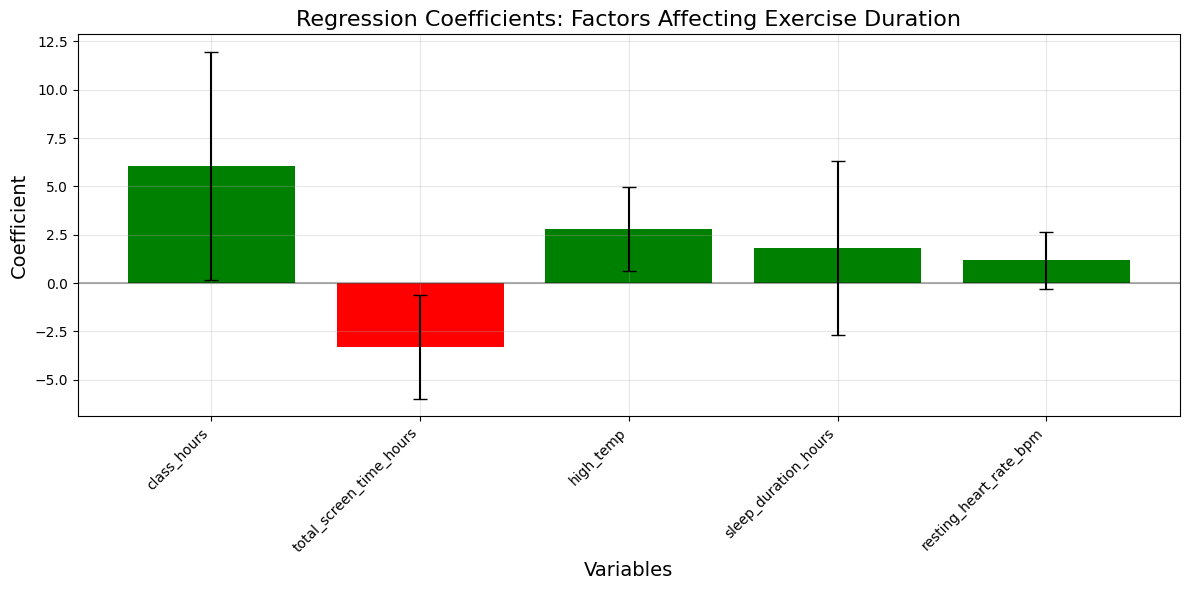


---
Now predicting screen time based on other factors:

Regression Results for Predicting Screen Time:
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         5.0410      6.613      0.762      0.453      -8.552      18.634
exercise_duration_minutes    -0.0166      0.014     -1.225      0.232      -0.044       0.011
sleep_duration_hours         -0.0590      0.321     -0.184      0.856      -0.718       0.600
class_hours                  -0.1370      0.426     -0.321      0.751      -1.013       0.739
high_temp                    -0.0812      0.157     -0.516      0.610      -0.404       0.242
resting_heart_rate_bpm        0.1067      0.105      1.013      0.321      -0.110       0.323

Model Statistics:
R-squared: 0.1093
Adjusted R-squared: -0.0620

Factors ranked by influence on screen time:
- class_hours: 0.1370
- resting_he

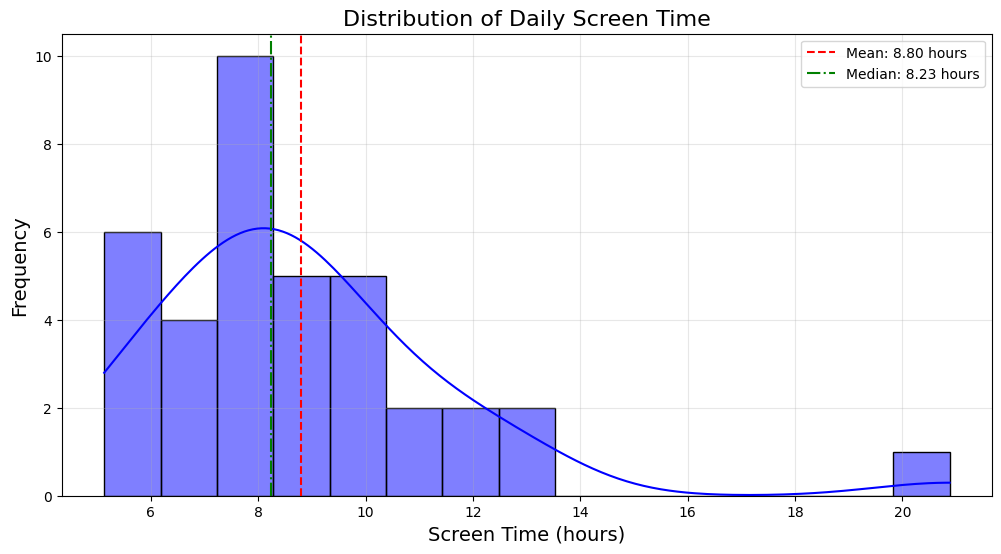

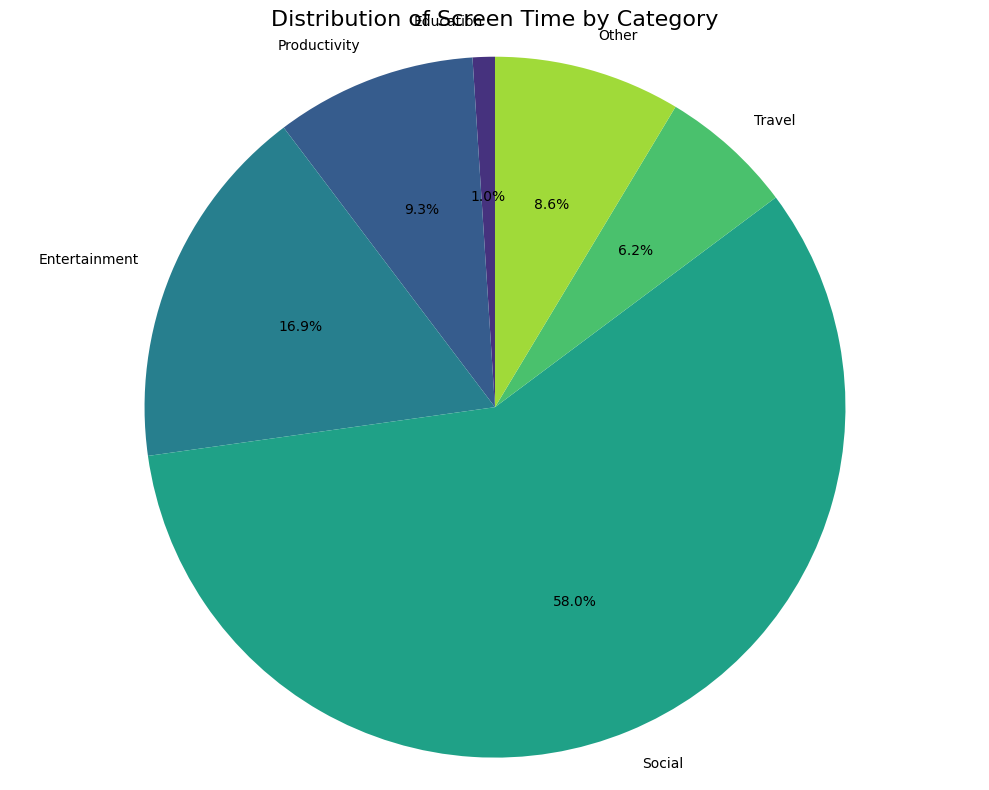

<ipython-input-13-049765d3ae63>:425: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Hours', data=category_df, palette='viridis')


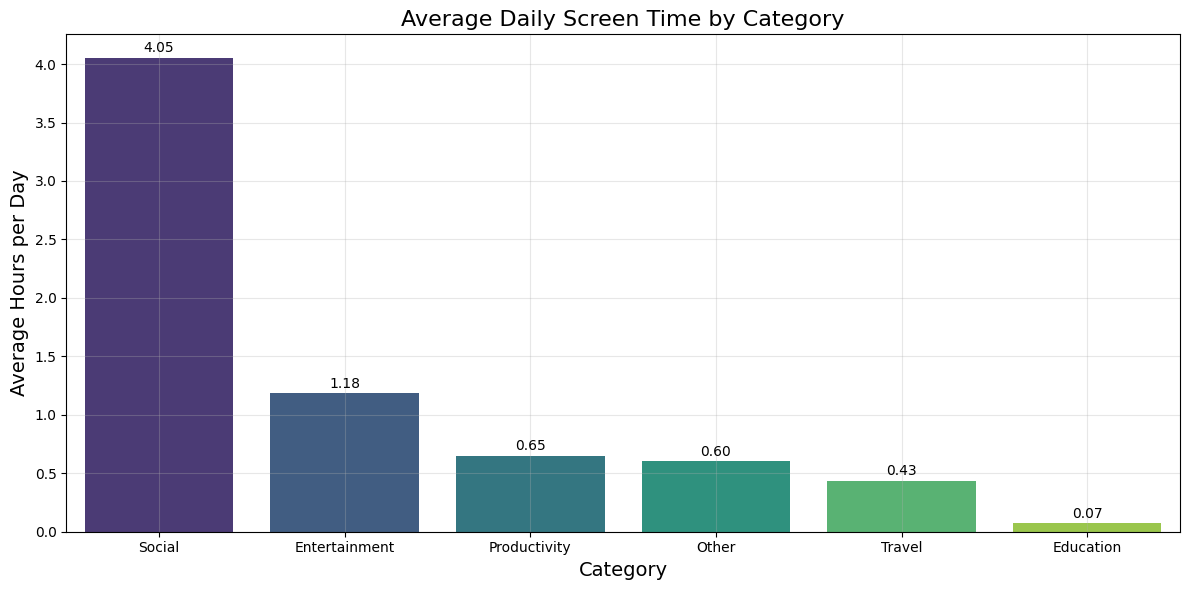


2. SCREEN TIME vs EXERCISE DURATION ANALYSIS
--------------------------------------------------

Basic exercise duration statistics:
count     36.000000
mean      43.000000
std       43.685238
min        1.000000
25%       11.250000
50%       24.500000
75%       62.000000
max      137.000000
Name: exercise_duration_minutes, dtype: float64

Correlation between screen time and exercise duration: -0.2903


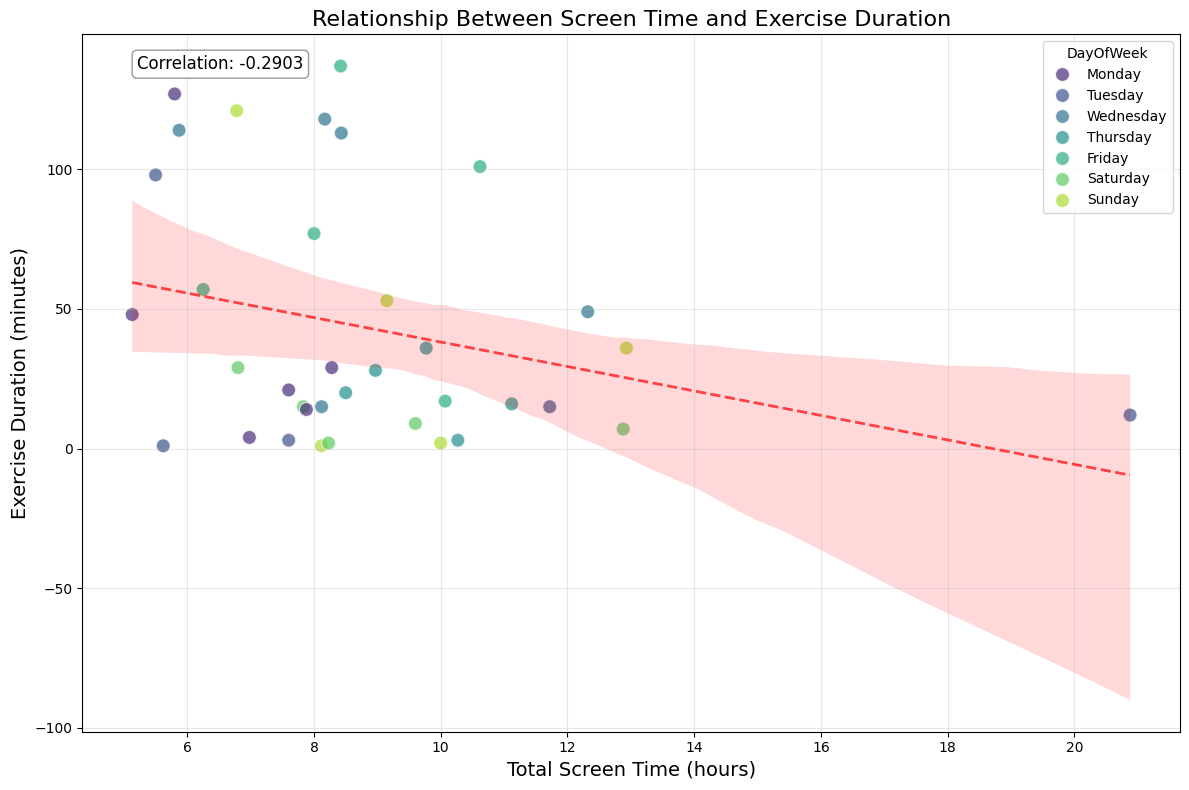


3. SCREEN TIME vs DAILY STEPS ANALYSIS
--------------------------------------------------

Basic daily steps statistics:
count       37.000000
mean     11955.972973
std       5491.682365
min       2619.000000
25%       7794.000000
50%      11567.000000
75%      16243.000000
max      24529.000000
Name: daily_steps, dtype: float64

Correlation between screen time and daily steps: -0.2413


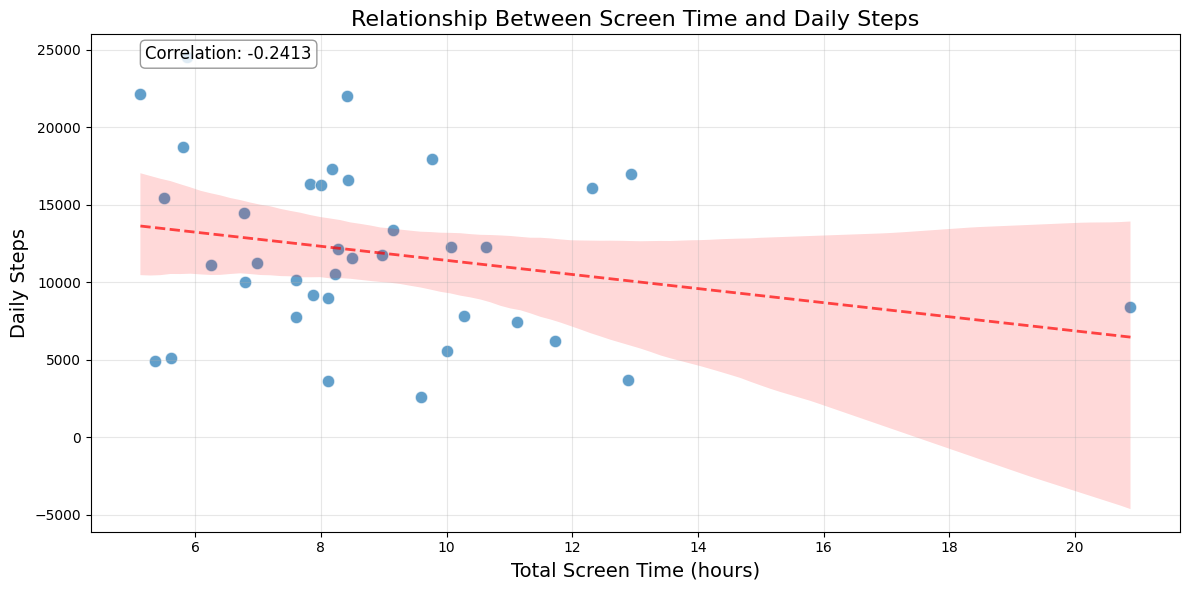


4. CLASS HOURS ANALYSIS
--------------------------------------------------

Basic class hours statistics:
count    37.000000
mean      1.945946
std       1.418057
min       0.000000
25%       0.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: class_hours, dtype: float64

Correlation between class hours and screen time: 0.0219
Correlation between class hours and exercise duration: 0.2326


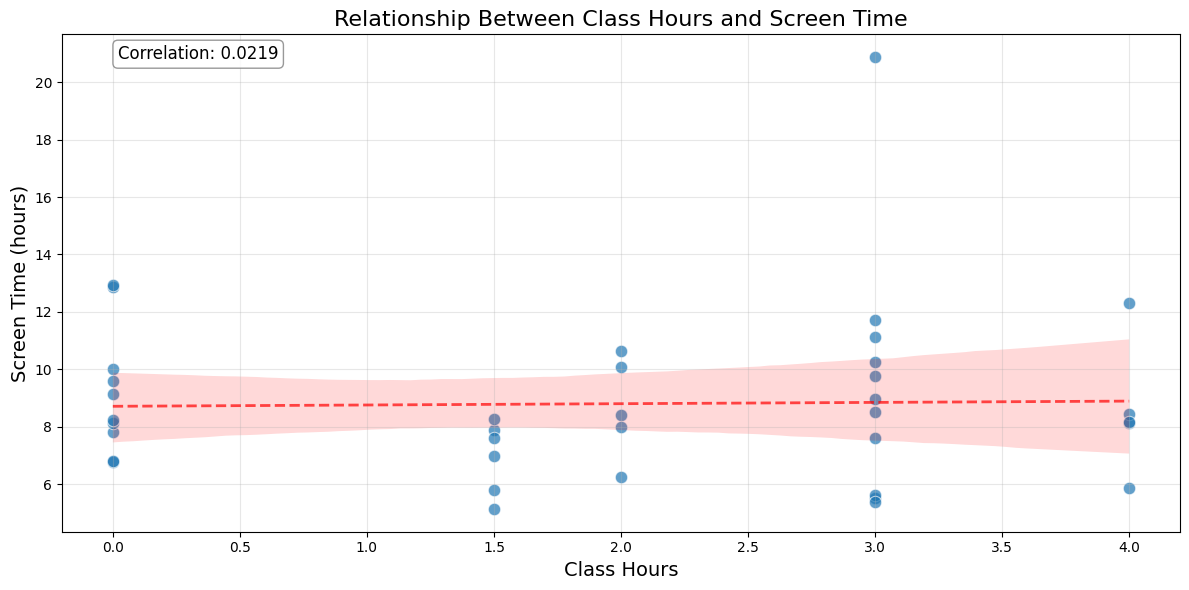

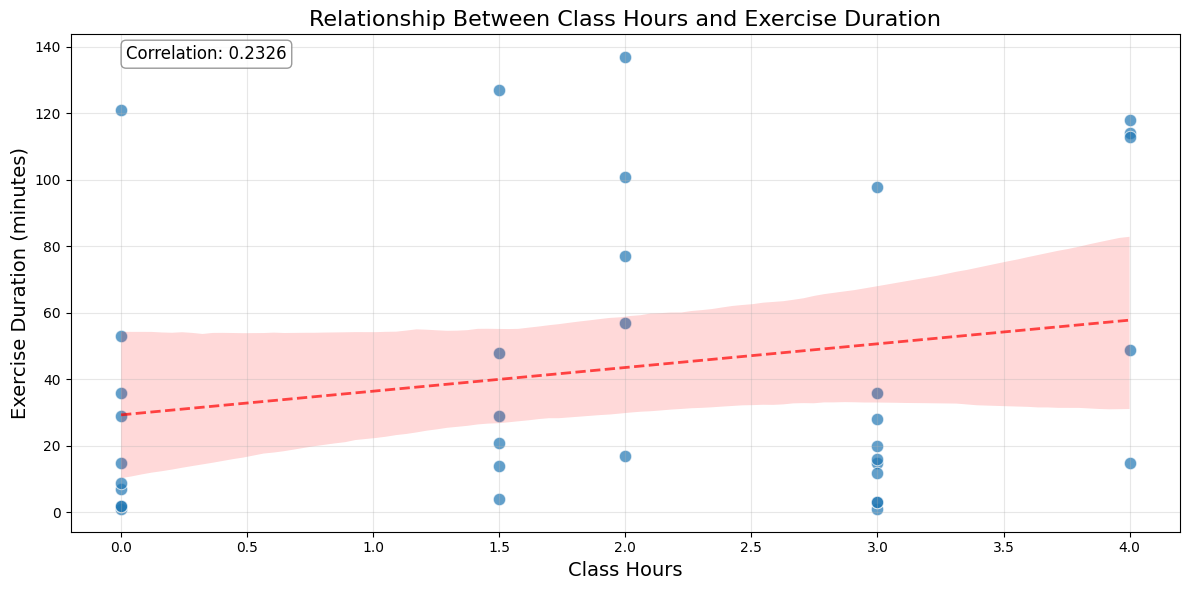


Moderator Analysis - Class Hours:
Low Class Hours (<2.0 hours): Correlation between screen time and exercise = -0.3981
High Class Hours (≥2.0 hours): Correlation between screen time and exercise = -0.3172


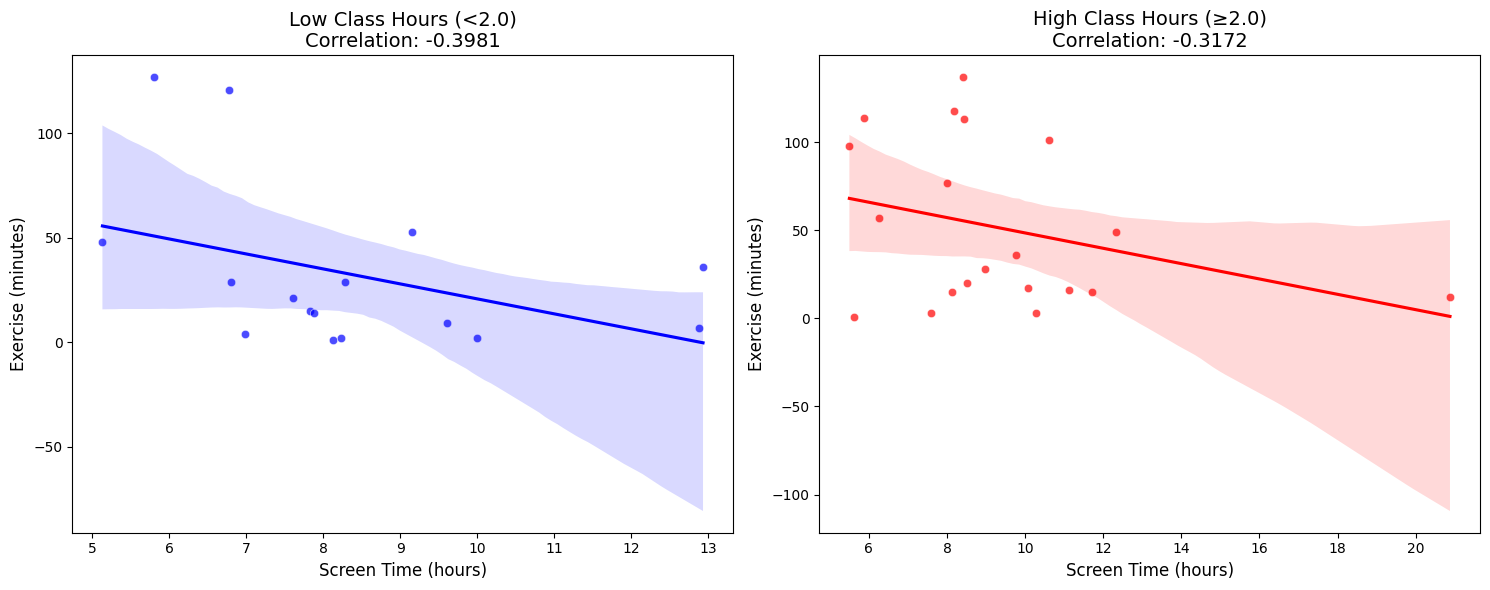


5. HEART RATE & ACTIVE CALORIES ANALYSIS
--------------------------------------------------

Correlations with screen time:
resting_heart_rate_bpm: 0.0755
average_daily_heart_rate_bpm: -0.1094
active_calories_burned: -0.0694


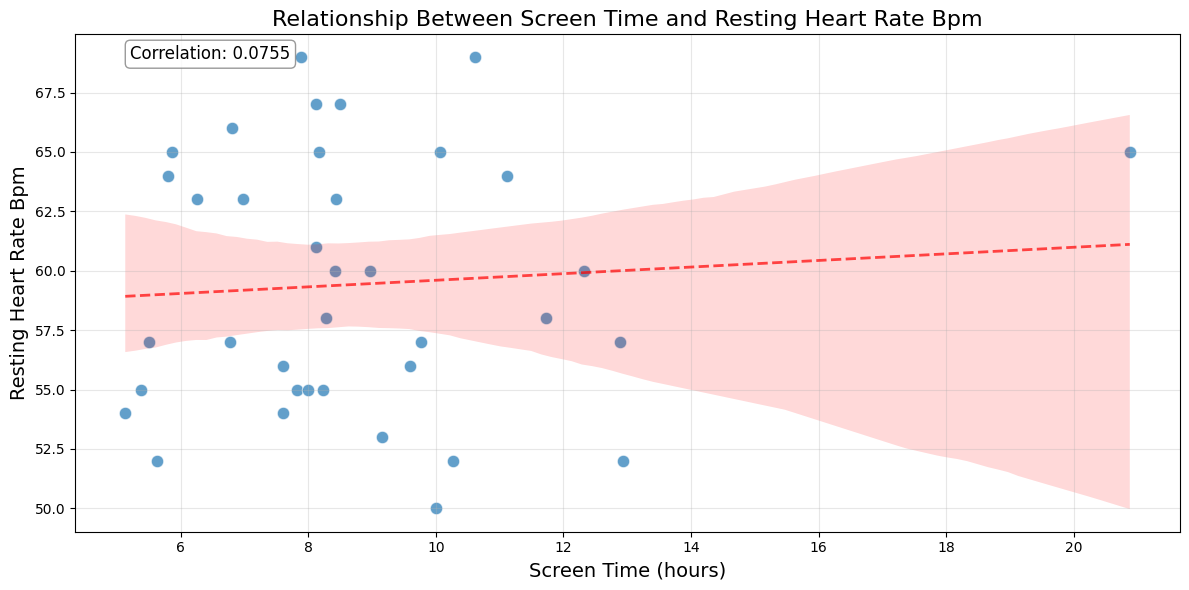

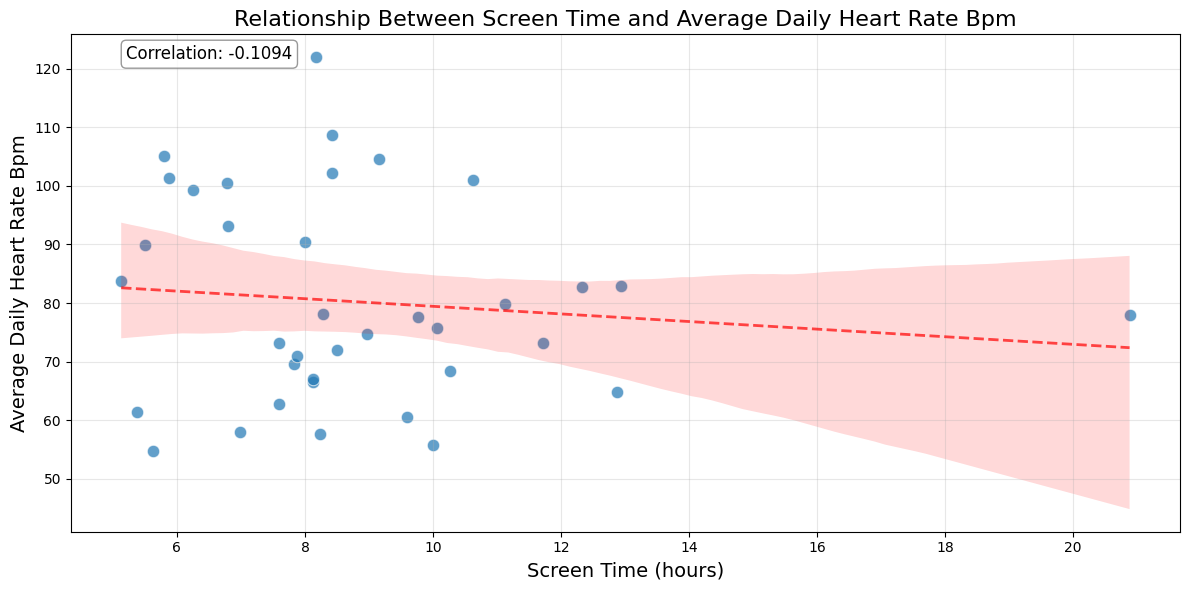

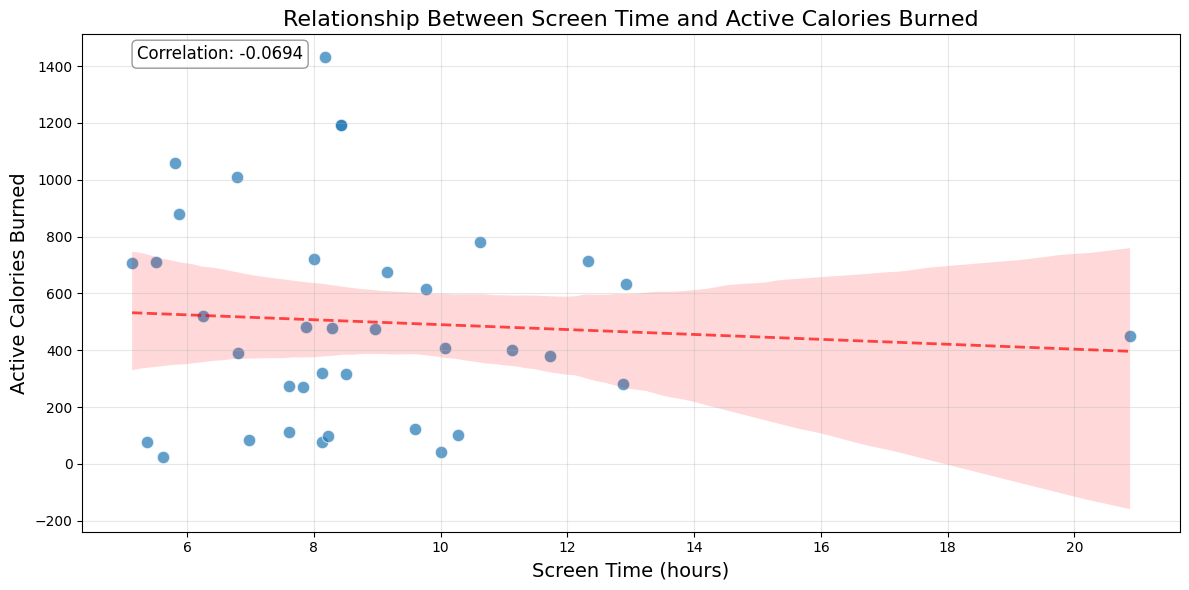

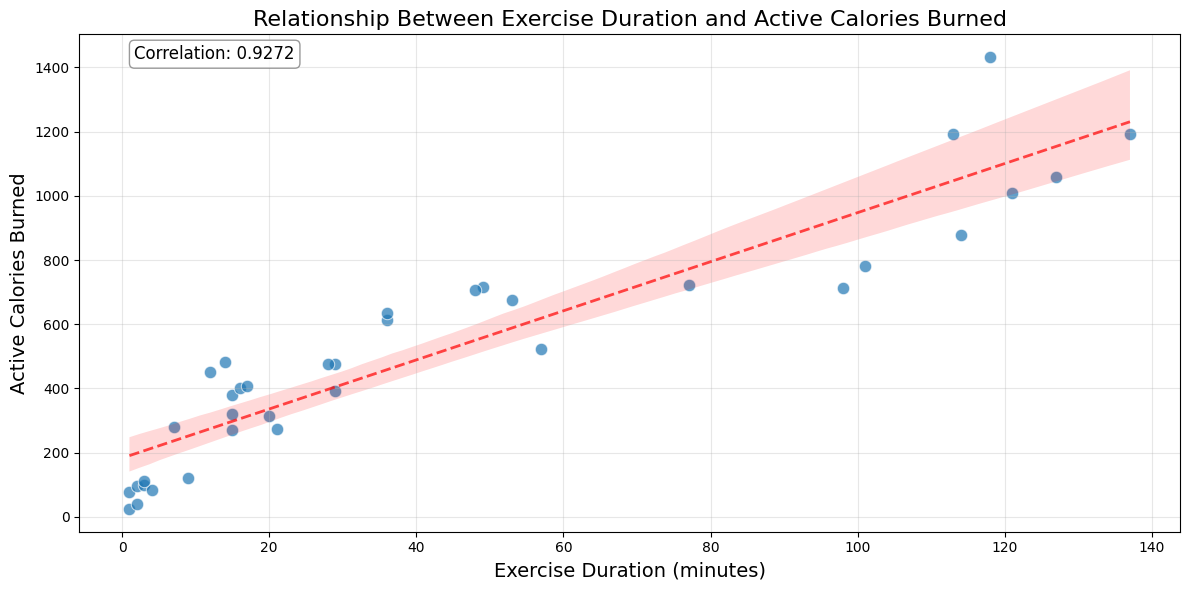


Correlation between exercise duration and active calories burned: 0.9272

6. WEATHER ANALYSIS
--------------------------------------------------

Weather correlations with screen time:
high_temp vs screen time: -0.2855
high_temp vs exercise duration: 0.2952
low_temp vs screen time: -0.1175
low_temp vs exercise duration: 0.1784
humidity vs screen time: 0.3774
humidity vs exercise duration: -0.4425


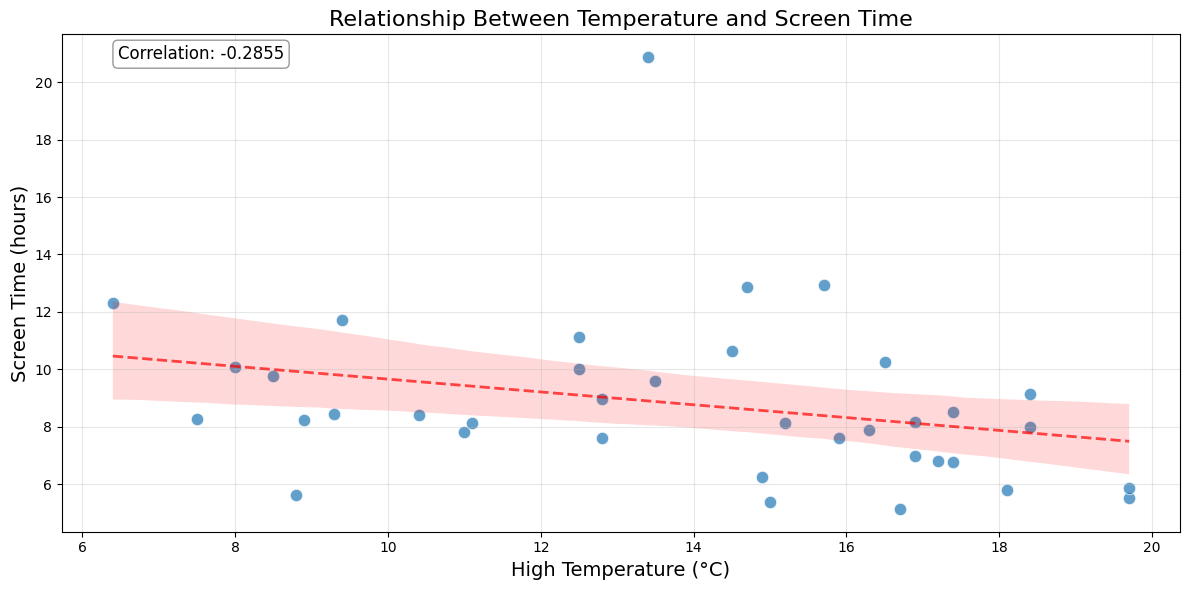

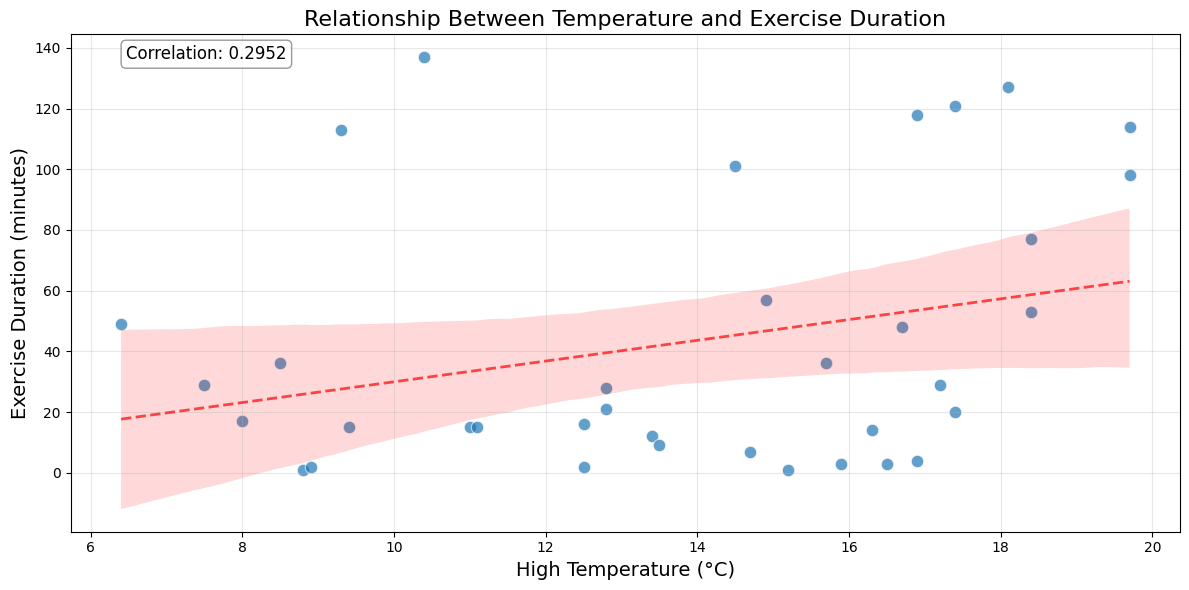


Weather condition counts:
weather_simple
Rainy     21
Cloudy    12
Clear      4
Name: count, dtype: int64


<ipython-input-13-049765d3ae63>:899: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


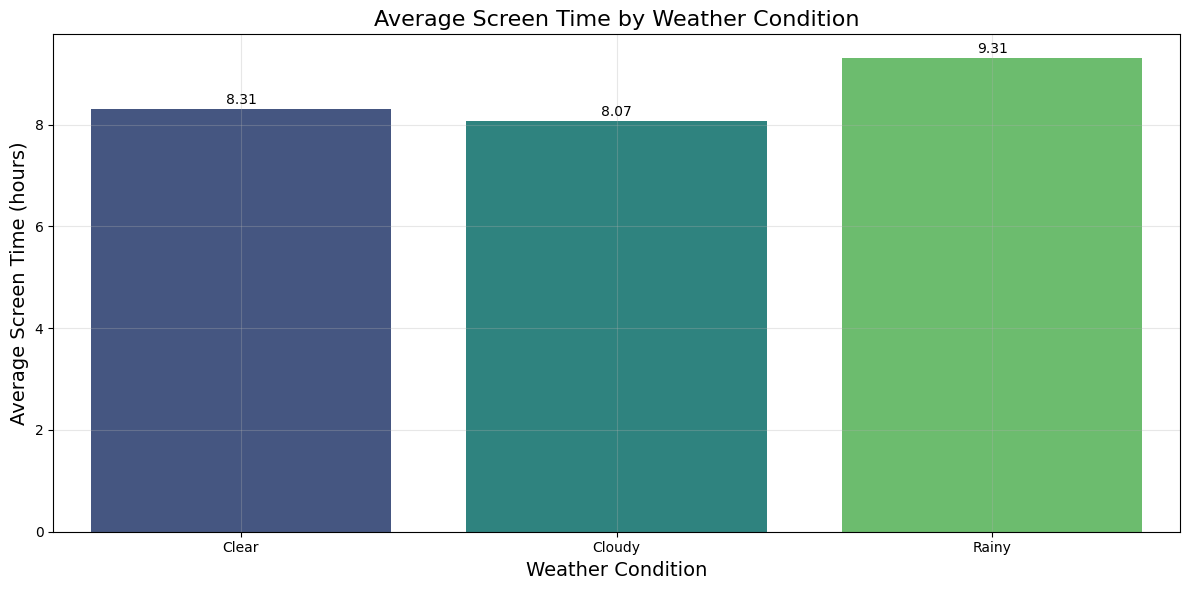

<ipython-input-13-049765d3ae63>:920: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


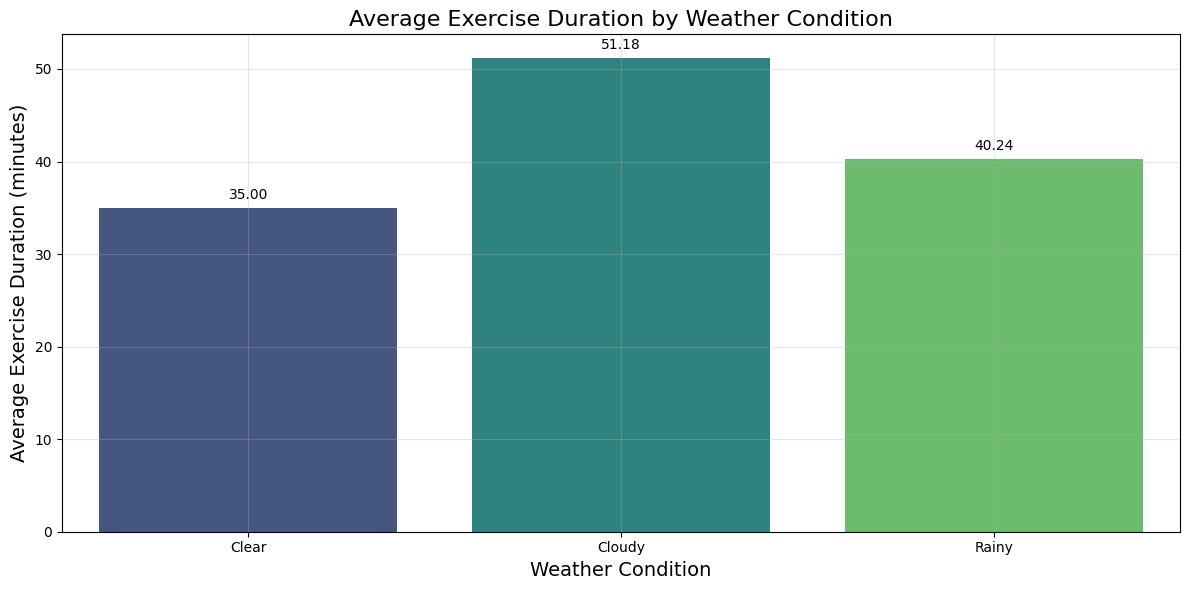

<ipython-input-13-049765d3ae63>:941: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


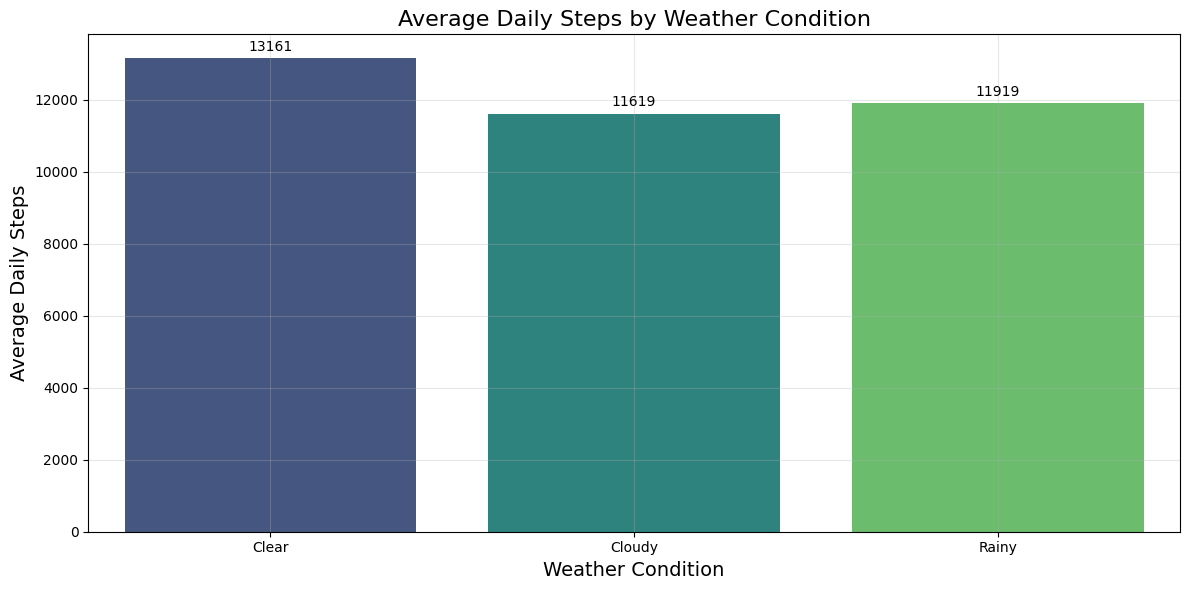


Average metrics by weather condition:
  weather_simple  total_screen_time_hours  exercise_duration_minutes  \
0          Clear                 8.312500                  35.000000   
1         Cloudy                 8.073333                  51.181818   
2          Rainy                 9.307143                  40.238095   

    daily_steps  
0  13161.250000  
1  11619.333333  
2  11918.761905  

7. CORRELATION MATRIX
--------------------------------------------------


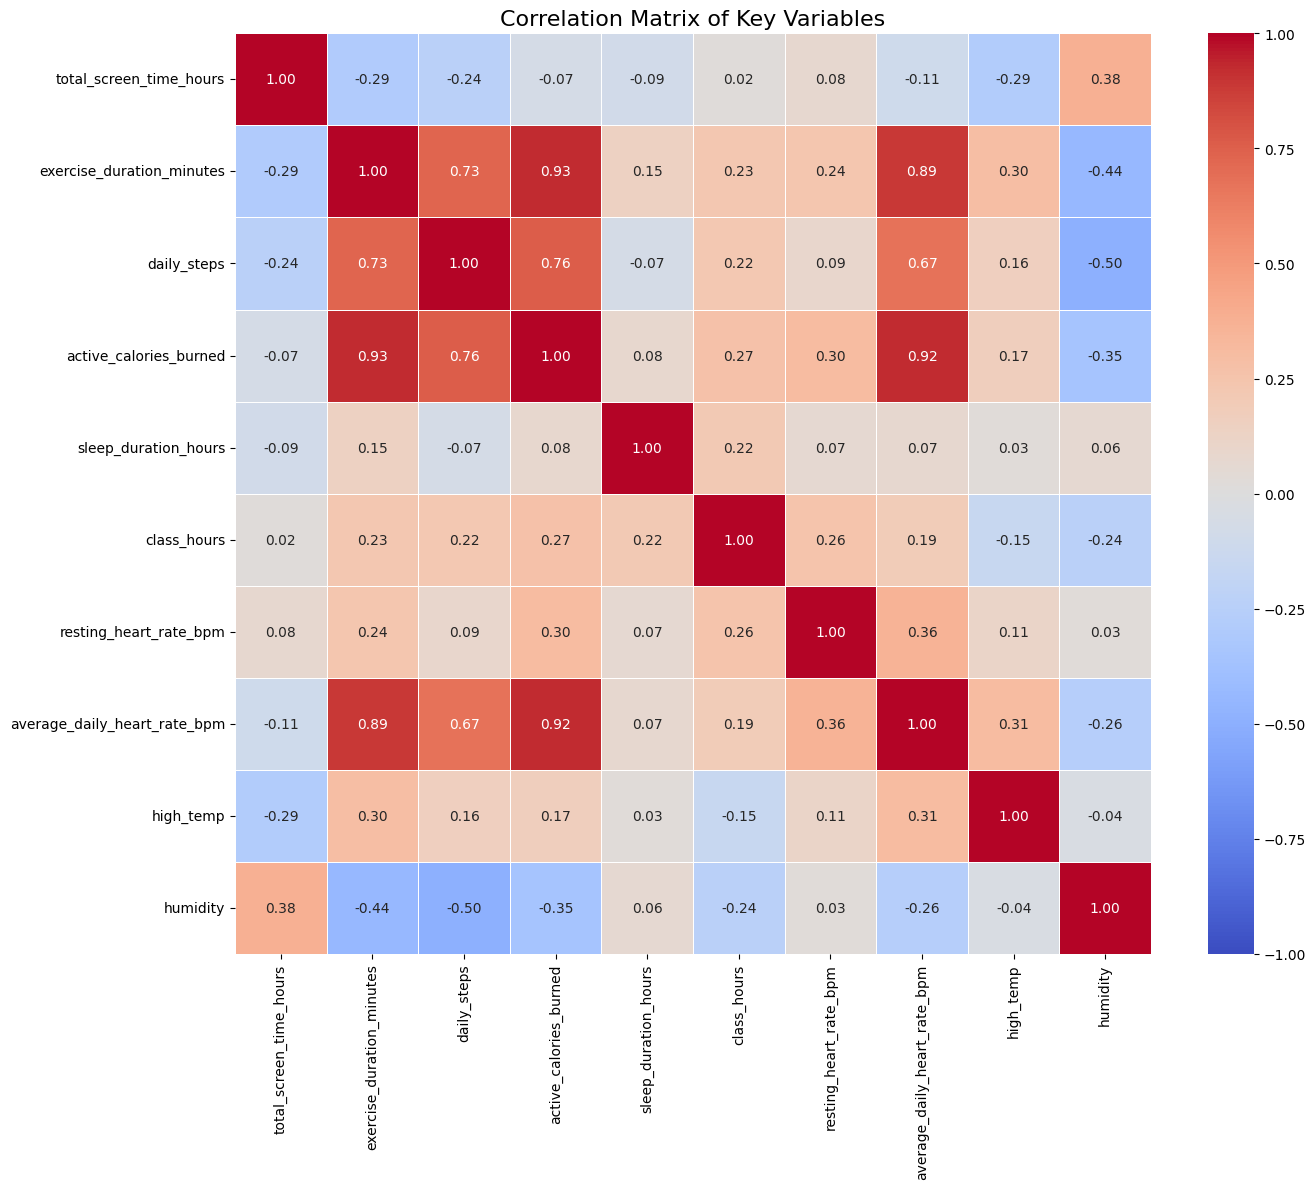


Correlations with screen time:
humidity: 0.3774 (moderate positive correlation)
resting_heart_rate_bpm: 0.0755 (weak positive correlation)
class_hours: 0.0219 (weak positive correlation)
active_calories_burned: -0.0694 (weak negative correlation)
sleep_duration_hours: -0.0899 (weak negative correlation)
average_daily_heart_rate_bpm: -0.1094 (weak negative correlation)
daily_steps: -0.2413 (weak negative correlation)
high_temp: -0.2855 (weak negative correlation)
exercise_duration_minutes: -0.2903 (weak negative correlation)


In [ ]:
import pandas as pd
import requests
import io
from google.colab import files
from datetime import datetime, timedelta
import csv  # for quoting options

API_KEY = "7H4THT9QDNSJX23R5SX52VJDV"
location = "Istanbul,Turkey"
start_date = datetime.strptime("2025-03-14", "%Y-%m-%d")
end_date = datetime.today()

def fetch_weather_chunk(start, end):
    url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}/{start}/{end}"
    params = {
        "unitGroup": "metric",
        "key": API_KEY,
        "include": "days",
        "contentType": "csv"
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        print(f"Error fetching data from {start} to {end}: {response.text}")
        return pd.DataFrame()
    df = pd.read_csv(io.StringIO(response.text))

    df["name"] = df["name"].str.encode("latin1").str.decode("utf-8")
    df = df[["datetime", "conditions", "tempmax", "tempmin", "humidity"]]
    df.columns = ["date", "weather_condition", "high_temp", "low_temp", "humidity"]
    return df

weather_frames = []
current = start_date

while current < end_date:
    next_month = (current.replace(day=1) + timedelta(days=32)).replace(day=1)
    chunk_end = min(end_date, next_month - timedelta(days=1))
    print(f"Fetching: {current.date()} to {chunk_end.date()}")
    chunk_df = fetch_weather_chunk(current.strftime("%Y-%m-%d"), chunk_end.strftime("%Y-%m-%d"))
    weather_frames.append(chunk_df)
    current = next_month

weather_data = pd.concat(weather_frames, ignore_index=True)

filename = "istanbul_weather_cleaned.csv"
weather_data.to_csv(filename, index=False, quoting=csv.QUOTE_MINIMAL)  # ✅ fixed line
files.download(filename)






# Apple Health Data Collection

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import xml.etree.ElementTree as ET
from datetime import datetime
from collections import defaultdict
import csv
import pandas as pd
import zipfile
from google.colab import files

# --- Configuration ---
INPUT_FILE = "/content/drive/MyDrive/export_new.xml"
START_DATE = datetime(2025, 3, 17)
END_DATE = datetime(2025, 4, 22)

FILES = {
    "step_count": "daily_step_count.csv",
    "resting_hr": "resting_heart_rate.csv",
    "average_hr": "average_daily_heart_rate.csv",
    "active_energy": "active_calories.csv",
    "exercise_minutes": "exercise_duration.csv",
    "sleep_analysis": "sleep_duration.csv"
}

# --- Data containers ---
step_counts = defaultdict(float)
active_energy = defaultdict(float)
exercise_minutes = defaultdict(float)
heart_rates = defaultdict(list)
resting_heart_rates = defaultdict(list)
sleep_durations = defaultdict(float)

# --- Helper ---
def parse_date(s):
    return datetime.strptime(s[:19], "%Y-%m-%d %H:%M:%S")

# --- Parse XML ---
for event, elem in ET.iterparse(INPUT_FILE, events=("start",)):
    if elem.tag == "Record":
        r_type = elem.attrib.get("type")
        value = elem.attrib.get("value")
        start = parse_date(elem.attrib.get("startDate"))
        end = parse_date(elem.attrib.get("endDate"))
        date_key = start.date()

        if not (START_DATE.date() <= date_key <= END_DATE.date()):
            continue

        if r_type == "HKQuantityTypeIdentifierStepCount":
            step_counts[date_key] += float(value)

        elif r_type == "HKQuantityTypeIdentifierActiveEnergyBurned":
            active_energy[date_key] += float(value)

        elif r_type == "HKQuantityTypeIdentifierAppleExerciseTime":
            exercise_minutes[date_key] += float(value)

        elif r_type == "HKQuantityTypeIdentifierHeartRate":
            heart_rates[date_key].append(float(value))

        elif r_type == "HKQuantityTypeIdentifierRestingHeartRate":
            resting_heart_rates[date_key].append(float(value))

        elif r_type == "HKCategoryTypeIdentifierSleepAnalysis":
            duration_hours = (end - start).total_seconds() / 3600
            sleep_durations[date_key] += duration_hours

    elem.clear()

# --- Write CSVs ---
def write_csv(filename, data_dict, average=False):
    with open(filename, mode='w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["Date", "Value"])
        for date in sorted(data_dict):
            if average:
                values = data_dict[date]
                avg = sum(values) / len(values) if values else 0
                writer.writerow([date, round(avg, 2)])
            else:
                writer.writerow([date, round(data_dict[date], 2)])

write_csv(FILES["step_count"], step_counts)
write_csv(FILES["active_energy"], active_energy)
write_csv(FILES["exercise_minutes"], exercise_minutes)
write_csv(FILES["resting_hr"], resting_heart_rates, average=True)
write_csv(FILES["average_hr"], heart_rates, average=True)
write_csv(FILES["sleep_analysis"], sleep_durations)

# --- Preview each file ---
print("Preview of generated data:\n")
for name, filename in FILES.items():
    print(f"--- {name.replace('_', ' ').title()} ({filename}) ---")
    df = pd.read_csv(filename)
    display(df.head())

# --- Zip & Download ---
with zipfile.ZipFile("apple_health_data.zip", "w") as zipf:
    for file in FILES.values():
        zipf.write(file)

files.download("apple_health_data.zip")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Preview of generated data:

--- Step Count (daily_step_count.csv) ---


,Date,Value
0,2025-03-17,18698.0
1,2025-03-18,6194.0
2,2025-03-19,16079.0
3,2025-03-20,17976.0
4,2025-03-21,22038.0


--- Resting Hr (resting_heart_rate.csv) ---


,Date,Value
0,2025-03-17,64.0
1,2025-03-18,58.0
2,2025-03-19,60.0
3,2025-03-20,57.0
4,2025-03-21,60.0


--- Average Hr (average_daily_heart_rate.csv) ---


,Date,Value
0,2025-03-17,105.03
1,2025-03-18,73.11
2,2025-03-19,82.69
3,2025-03-20,77.59
4,2025-03-21,102.23


--- Active Energy (active_calories.csv) ---


,Date,Value
0,2025-03-17,1059.94
1,2025-03-18,380.00
2,2025-03-19,714.69
3,2025-03-20,614.48
4,2025-03-21,1193.71


--- Exercise Minutes (exercise_duration.csv) ---


,Date,Value
0,2025-03-17,127.0
1,2025-03-18,15.0
2,2025-03-19,49.0
3,2025-03-20,36.0
4,2025-03-21,137.0


--- Sleep Analysis (sleep_duration.csv) ---


,Date,Value
0,2025-03-20,5.30
1,2025-03-21,7.96
2,2025-03-22,5.44
3,2025-03-23,7.10
4,2025-03-24,5.75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>